All traded assets are illiquid. The bid ask spread, measuring
the difference between the price at which you can buy and sell
the asset at the same point in time is the illiquidity measure.

We can regress the bid-ask spread (as a percent of the
price) against variables that can be measured for a private
firm (such as revenues, cash flow generating capacity, type of
assets, variance in operating income) and are also available for
publicly traded firms.

Using data from the end of 2000, for instance, we regressed the
bid-ask spread against annual revenues, a dummy variable for
positive earnings (DERN: 0 if negative and 1 if positive), cash as
a percent of firm value and trading volume.
    § Spread = 0.145 - 0.0022 ln (Annual Revenues) -0.015 (DERN) - 0.016 (Cash/Firm Value) - 0.11 ($ Monthly trading volume/ Firm Value)
    § You could plug in the values for a private firm into this regression (with zero trading volume) and estimate the spread for the firm.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from download_company import YahooFinance

For this exercise, we will use the top and bottom 50 U.S.-headquarted companies with market cap above $10M

In [2]:
# R2 score: 3%
top50_by_mkt_cap = [
    'AAPL',
    'MSFT',
    'NVDA',
    'AMZN',
    'GOOG',
    'GOOGL',
    'META',
    'BRK-B',
    # 'BRK-A',  # Removed due to outlier stats
    'TSLA',
    'AVGO',
    'LLY',
    'WMT',
    'JPM',
    'V',
    'MA',
    'XOM',
    'NFLX',
    'COST',
    'ORCL',
    'UNH',
    'PG',
    'JNJ',
    'HD',
    'ABBV',
    'KO',
    'BAC',
    'TMUS',
    'PM',
    'PLTR',
    'CRM',
    'CVX',
    'CCZ',
    'WFC',
    'MCD',
    'CSCO',
    'ABT',
    'IBM',
    'LIN',
    'GE',
    'MRK',
    'OPHC',
    'VIVK',
    'PRLD',
    'PED',
    'SPAI',
    'ICCC',
    'BTOC',
    'OTLK',
]

# R2 score: 12%
bottom50_by_mkt_cap = [
    'BBGI',
    'ASTC',
    'FLYE',
    'AWX',
    'RMCF',
    'AEI',
    'SNSE',
    'HOOK',
    'BTAI',
    'SHOTW',
    'EDUC',
    'CAPS',
    'SANW',
    'SONM',
    'SDOT',
    'DWTX',
    'DATS',
    'SSKN',
    'KDLY',
    'EKSO',
    'ICU',
    'ATHA',
    'GPUS',
    'SHFS',
    'HOTH',
    'ERNA',
    'SLNH',
    'HYFM',
    'BPT',
    'COSM',
    'BLNE',
    'STRM',
    'BLBX',
    'CODX',
    'DRCT',
    'AQMS',
    'DLPN',
    'REBN',
    'NERV',
    'SCNX',
    'AIRI',
    'RLYB',
    'ECDA',
    'PAVM',
    'IMNN',
    'BRTX',
    'LDTC',
    'NXTC',
    'BNGO',
    'BLDEW',
]

In [3]:
companies_above_1m = [
    'AAPL',
    'MSFT',
    'NVDA',
    'AMZN',
    'GOOG',
    'GOOGL',
    'META',
    'BRK-B',
    # 'BRK-A',    # Excluded outlier
    'TSLA',
    'AVGO',
    'LLY',
    'WMT',
    'JPM',
    'V',
    'MA',
    'XOM',
    'NFLX',
    'COST',
    'ORCL',
    'UNH',
    'PG',
    'JNJ',
    'HD',
    'ABBV',
    'KO',
    'BAC',
    'TMUS',
    'PM',
    'PLTR',
    'CRM',
    'CVX',
    'CCZ',
    'WFC',
    'MCD',
    'CSCO',
    'ABT',
    'IBM',
    'LIN',
    'GE',
    'MRK',
    'OPHC',
    'VIVK',
    'PRLD',
    'PED',
    'SPAI',
    'ICCC',
    'BTOC',
    'OTLK',
    'PVL',
    'CLST',
    'SACH',
    'TCBS',
    'CUE',
    'ACET',
    'FBIO',
    'FATBB',
    'CULP',
    'FOSL',
    'CATO',
    'OSS',
    'PRT',
    'AIRG',
    'NVNO',
    'TLYS',
    'CNVS',
    'RRGB',
    'LRFC',
    'FAT',
    'MESA',
    'KPTI',
    'AIRTP',
    'HOUR',
    'ANEB',
    'NEOVW',
    'AGAE',
    'PFXNZ',
    'HUMAW',
    'QRHC',
    'FBLG',
    'CCEL',
    'VTSI',
    'MRSN',
    'TZUP',
    'NXN',
    'VRCA',
    'AIRT',
    'NDLS',
    'IPWR',
    'BDL',
    'PODC',
    'RGS',
    'FBRX',
    'OMEX',
    'BRFH',
    'KORE',
    'USIO',
    'ISPO',
    'OPXS',
    'KOSS',
    'IPSC',
    'CVU',
    'TNYA',
    'FOXX',
    'GORO',
    'XLO',
    'ATRA',
    'WHLRL',
    'HFBL',
    'MDBH',
    'TPIC',
    'RNTX',
    'CMTL',
    'ICMB',
    'RFIL',
    'LASE',
    'CAMP',
    'NRT',
    'SNAL',
    'FTCI',
    'ATNM',
    'BLUE',
    'BIRD',
    'SPRO',
    'CNTY',
    'SCWO',
    'ASRV',
    'RVPH',
    'HOWL',
    'OMCC',
    'RMTI',
    'PBBK',
    'TURN',
    'AP',
    'SCYX',
    'LNZA',
    'USEG',
    'SYPR',
    'FARM',
    'DWSN',
    'LTRN',
    'INHD',
    'BW',
    'BTCS',
    'KITT',
    'UG',
    'IRD',
    'MPU',
    'STTK',
    'TELA',
    'SST',
    'SHOT',
    'DXR',
    'MODD',
    'BGSF',
    'ANTX',
    'XBP',
    'AIFF',
    'EVLVW',
    'JFB',
    'RAVE',
    'BCG',
    'JRSH',
    'AMPG',
    'HIT',
    'CELU',
    'RNXT',
    'ESLA',
    'LGL',
    'TACT',
    'KLXE',
    'VHC',
    'WWR',
    'REFR',
    'DYAI',
    'AHT',
    'SPRU',
    'NRXP',
    'OKUR',
    'NINE',
    'FCUV',
    'CVGI',
    'PXLW',
    'KSCP',
    'KZR',
    'AWRE',
    'HHS',
    'APYX',
    'FEMY',
    'ALGS',
    'LIVE',
    'BWEN',
    'XFOR',
    'IZEA',
    'SRZN',
    'BOLD',
    'WYY',
    'KPLT',
    'SCLX',
    'ACCS',
    'FLDDW',
    'AIRJW',
    'MDAI',
    'CASI',
    'AISPW',
    'CRWS',
    'WW',
    'FGEN',
    'CVKD',
    'COCH',
    'XOS',
    'ARKR',
    'AAME',
    'NIXX',
    'AERT',
    'ANVS',
    'PPSI',
    'INKT',
    'BODI',
    'BZAIW',
    'AIRE',
    'WVVI',
    'CLIR',
    'STRRP',
    'AGFY',
    'FTEK',
    'ALLK',
    'NTIP',
    'SIDU',
    'UHGWW',
    'MOBX',
    'FPAY',
    'GROW',
    'INTG',
    'SDST',
    'ALXO',
    'NTWK',
    'OPAD',
    'GBIO',
    'RDI',
    'PZG',
    'FLUX',
    'GORV',
    'DALN',
    'GWH',
    'TPST',
    'POCI',
    'CGTX',
    'DTST',
    'HSON',
    'OPI',
    'NOVA',
    'TOON',
    'MSAI',
    'SOND',
    'SVT',
    'SGRP',
    'OSRH',
    'DARE',
    'KTCC',
    'LGVN',
    'COEP',
    'CLNN',
    'BCAB',
    'SLDPW',
    'CDIO',
    'YHGJ',
    'SCOR',
    'TLF',
    'OVID',
    'PULM',
    'INTZ',
    'NXL',
    'TPCS',
    'OESX',
    'VRAR',
    'IGC',
    'ASBP',
    'BEEM',
    'CXAI',
    'UONEK',
    'NSYS',
    'XHLD',
    'OCC',
    'TENX',
    'QTTB',
    'GAME',
    'CKX',
    'RVP',
    'CVM',
    'RAIN',
    'BSGM',
    'ELEV',
    'NNVC',
    'JUNS',
    'CPSH',
    'BATL',
    'NIOBW',
    'MBBC',
    'BEATW',
    'LSTA',
    'VYNE',
    'TRT',
    'CJMB',
    'RLMD',
    'CVV',
    'MTEX',
    'NEPH',
    'DAIO',
    'FTHM',
    'IHT',
    'MODV',
    'FGF',
    'JOB',
    'FGFPP',
    'KFFB',
    'SMSI',
    'DRRX',
    'GRYP',
    'KALA',
    'UPXI',
    'IRIX',
    'CETY',
    'BGFV',
    'GTIM',
    'CREX',
    'JVA',
    'CALC',
    'NMTC',
    'PASG',
    'ADGM',
    'VSEE',
    'SWAG',
    'RMSG',
    'GREE',
    'NXGL',
    'MSS',
    'ALLR',
    'XAIR',
    'NESRW',
    'NAII',
    'ANNAW',
    'RMCO',
    'TALKW',
    'SBCWW',
    'BOF',
    'IPW',
    'IPM',
    'AMS',
    'LVLU',
    'MIRA',
    'BLIN',
    'BFRG',
    'COCP',
    'LTRY',
    'COHN',
    'LPCN',
    'KIRK',
    'GLYC',
    'UBX',
    'ATER',
    'WVVIP',
    'HBIO',
    'ABP',
    'AMOD',
    'SKYQ',
    'RENT',
    'LPTX',
    'RVMDW',
    'MSPR',
    'SABS',
    'MDRR',
    'CING',
    'MKZR',
    'TOMZ',
    'SIF',
    'FAAS',
    'ZBAI',
    'YOSH',
    'HOVR',
    'FEAM',
    'EQ',
    'BIVI',
    'VVOS',
    'PRPH',
    'ABVC',
    'INAB',
    'SNYR',
    'ILLRW',
    'BNAI',
    'BNZI',
    'GLBZ',
    'NXPL',
    'USGOW',
    'BOLT',
    'SOHO',
    'STI',
    'CYCU',
    'MBRX',
    'SPWRW',
    'WALDW',
    'ELSE',
    'AXDX',
    'ALUR',
    'CLRB',
    'CLRO',
    'UAVS',
    'NVFY',
    'MEIP',
    'NEHC',
    'YYAI',
    'CRIS',
    'JCTC',
    'LIDR',
    'SYBX',
    'EQS',
    'BRN',
    'MXC',
    'GOVX',
    'KIDZ',
    'CNTM',
    'PSTV',
    'MRKR',
    'TXMD',
    'TAIT',
    'BLDEW',
    'BNGO',
    'NXTC',
    'LDTC',
    'BRTX',
    'IMNN',
    'PAVM',
    'ECDA',
    'RLYB',
    'AIRI',
    'SCNX',
    'NERV',
    'REBN',
    'DLPN',
    'AQMS',
    'DRCT',
    'CODX',
    'BLBX',
    'STRM',
    'BLNE',
    'COSM',
    'BPT',
    'HYFM',
    'SLNH',
    'ERNA',
    'HOTH',
    'SHFS',
    'GPUS',
    'ATHA',
    'ICU',
    'EKSO',
    'KDLY',
    'SSKN',
    'DATS',
    'DWTX',
    'SDOT',
    'SONM',
    'SANW',
    'CAPS',
    'EDUC',
    'SHOTW',
    'BTAI',
    'HOOK',
    'SNSE',
    'AEI',
    'RMCF',
    'AWX',
    'FLYE',
    'ASTC',
    'BBGI',
]

Downloading required data and formatting into a dataset

In [4]:
# Download required data from companies
downloader = YahooFinance()

# data = downloader.download_companies(top50_by_mkt_cap)
# data = downloader.download_companies(bottom50_by_mkt_cap)
# data = downloader.download_companies(top50_by_mkt_cap + bottom50_by_mkt_cap)
data = downloader.download_companies(companies_above_1m)

df = pd.DataFrame()
for ticker, company in data.items():
    df = pd.concat([df, company.get_df()])
df

Bad value when downloading data for company: JPM
Field: 'enterpriseToEbitda'
Bad value when downloading data for company: ABBV
Field: 'returnOnEquity'
Bad value when downloading data for company: BAC
Field: 'enterpriseToEbitda'
Bad value when downloading data for company: PM
Field: 'returnOnEquity'
Bad value when downloading data for company: CCZ
Field: 'totalRevenue'
Bad value when downloading data for company: WFC
Field: 'enterpriseToEbitda'
Bad value when downloading data for company: MCD
Field: 'returnOnEquity'
Bad value when downloading data for company: ABT
Field: 'returnOnEquity'
Bad value when downloading data for company: MRK
Field: 'returnOnEquity'
Bad value when downloading data for company: OPHC
Field: 'enterpriseToEbitda'
Bad value when downloading data for company: PRLD
Field: 'revenueGrowth'
Bad value when downloading data for company: SPAI
Field: 'beta'
Bad value when downloading data for company: BTOC
Field: 'beta'
Bad value when downloading data for company: OTLK
Fiel

,Log Revenues,DERN,Cash-to-EV,Volume-to-EV,Revenue Growth,Payout Ratio,Beta,Return on Equity,Debt-to-EV,EV/EBITDA Ratio,Bid-Ask Spread
AAPL,26.704074,1.0,0.016722,0.000019,0.040,0.1571,1.259,1.36520,0.030101,23.413,0.002131
MSFT,26.290854,1.0,0.024169,0.000008,0.123,0.2482,1.000,0.34291,0.034759,20.844,0.000837
NVDA,25.594616,1.0,0.016447,0.000112,0.779,0.0116,1.958,1.19177,0.003909,31.532,0.005228
AMZN,27.181540,1.0,0.049606,0.000024,0.105,0.0000,1.393,0.24290,0.076173,16.935,0.001974
GOOG,26.608572,1.0,0.050179,0.000012,0.120,0.0893,1.035,0.34789,0.015001,13.999,0.002407
...,...,...,...,...,...,...,...,...,...,...,...
SLNH,17.453649,0.0,0.122638,0.008259,-0.182,0.0000,3.610,-1.44448,0.341159,-2.014,0.515159
GPUS,18.485176,0.0,0.259512,0.000864,-0.365,0.0000,3.689,-2.02522,1.231639,-8.405,0.007042
EKSO,16.701707,0.0,0.556312,0.017836,0.050,0.0000,1.332,-0.89519,0.512616,-1.319,0.571632
CAPS,17.619414,0.0,0.000194,0.006141,0.087,0.0000,-0.784,-0.09206,0.293501,-467.764,0.150000


In [5]:
df.shape

(93, 11)

Save data to CSV file

In [6]:
if True:
    df.to_excel('companies.xlsx')

Statistical Analysis

In [7]:
df.describe()

,Log Revenues,DERN,Cash-to-EV,Volume-to-EV,Revenue Growth,Payout Ratio,Beta,Return on Equity,Debt-to-EV,EV/EBITDA Ratio,Bid-Ask Spread
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,19.158609,0.322581,0.347645,0.014852,0.035742,0.127132,1.361387,-0.661639,0.426012,4.364333,0.256315
std,3.267206,0.469997,0.771405,0.051675,0.537203,0.669173,1.260668,1.743695,0.438925,207.884708,0.323392
min,13.601189,0.000000,0.000194,0.000006,-0.738000,0.000000,-1.318000,-14.142260,0.000000,-1554.903000,0.000837
25%,17.087010,0.000000,0.031943,0.000318,-0.167000,0.000000,0.731000,-0.733090,0.057085,-2.149000,0.043478
50%,18.233530,0.000000,0.102872,0.001591,-0.004000,0.000000,1.103000,-0.237500,0.311508,3.743000,0.095835
75%,20.034069,1.000000,0.259512,0.006098,0.116000,0.000000,1.753000,0.054420,0.657197,13.999000,0.540936
max,27.181540,1.000000,4.788184,0.399253,3.917000,6.250000,7.283000,1.365200,2.052186,781.746000,2.058824


In [8]:
def remove_outliers(df, column, lower_q=0.15, upper_q=0.85):
    lower_bound = df[column].quantile(lower_q)
    upper_bound = df[column].quantile(upper_q)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

<Axes: xlabel='Log Revenues', ylabel='Count'>

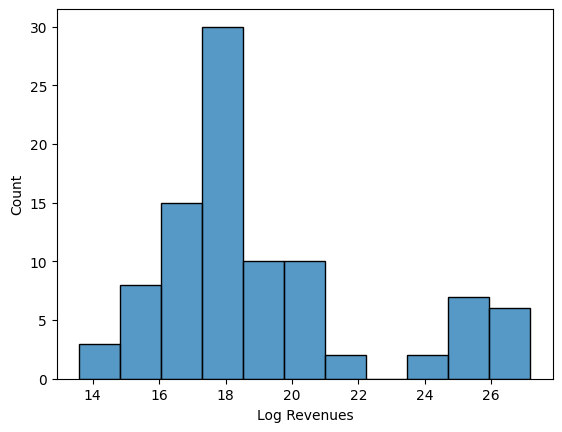

In [9]:
plot_log_rev = remove_outliers(df, 'Log Revenues', 0, 1)
plot_log_rev = plot_log_rev['Log Revenues']
sns.histplot(plot_log_rev)

Fit linear regression model

In [10]:
features_df = df.iloc[:, :-1]
true_spread_df = df.iloc[:, -1]
print(features_df.shape)
print(true_spread_df.shape)

(93, 10)
(93,)


In [11]:
model = LinearRegression(fit_intercept=True)
model.fit(features_df, true_spread_df)
model.coef_

array([-2.24116734e-02, -9.31580799e-02, -3.18968896e-02, -6.48355569e-01,
       -4.57240829e-02, -1.18469835e-04, -8.42862048e-03,  1.42028839e-03,
        5.82044204e-02, -5.08945719e-05])

In [12]:
predicted_spread_df = model.predict(features_df)
print('R2 score:', r2_score(true_spread_df, predicted_spread_df))
print('Intercept:', model.intercept_)
print('Coefficients:')
for i, feature in enumerate(features_df.columns):
    print(feature + ':', model.coef_[i])

R2 score: 0.12267292318424639
Intercept: 0.7259507667429621
Coefficients:
Log Revenues: -0.022411673355994186
DERN: -0.09315807991843333
Cash-to-EV: -0.031896889581461044
Volume-to-EV: -0.6483555686286605
Revenue Growth: -0.04572408294152004
Payout Ratio: -0.00011846983525803776
Beta: -0.008428620484193102
Return on Equity: 0.001420288393562654
Debt-to-EV: 0.058204420424390994
EV/EBITDA Ratio: -5.089457188946645e-05


Some interesting insights:
- Try running this regression on just the top 50 + bottom 50 firms to get a 75%

Further plots

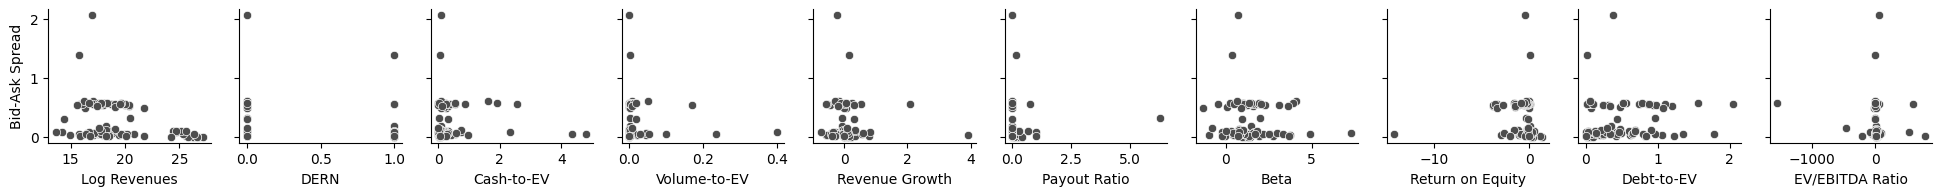

In [13]:
features_str = df.columns[:-1]
spread_str = df.columns[-1]

g = sns.PairGrid(df, y_vars=[spread_str], x_vars=features_str, height=2)
g.map(sns.scatterplot, color='.3')
# g.set(ylim=(-0.1, 0.1))

<Axes: xlabel='Log Revenues', ylabel='Bid-Ask Spread'>

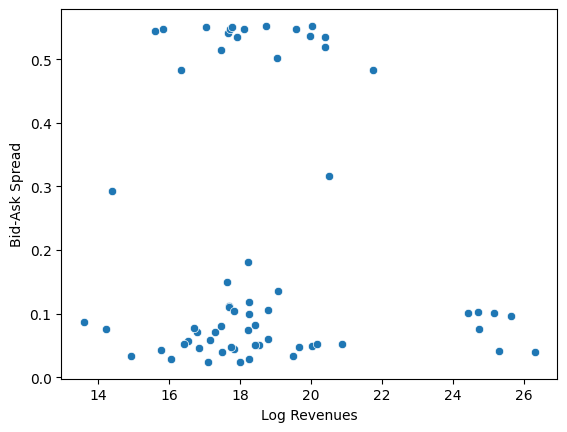

In [14]:
x = 'Log Revenues'
y = 'Bid-Ask Spread'
df = remove_outliers(df, y)

sns.scatterplot(df[[x, y]], x=x, y=y)